# Deep Learning: Ex.8 - RNN

Submitted by: Noam Bassat 308465434


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import SimpleRNN, LSTM # <--- recurrent layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap

print(tf.__version__)

2.4.0


***
### 1. Preprocess the text corpus

(if you are using google colab, remember to upload the corpus file first..)

In [2]:
f = open('war_and_peace.txt','r') # open the corpus file

text = f.read().lower()  # read file and convert to lower-case letters

text = text.replace('\n',' ')

print('len(text) = ',len(text))

print(text[:400]) # print the first 400 characters..

len(text) =  3196213
﻿"well, prince, so genoa and lucca are now just family estates of the buonapartes. but i warn you, if you don't tell me that this means war, if you still try to defend the infamies and horrors perpetrated by that antichrist--i really believe he is antichrist--i will have nothing more to do with you and you are no longer my friend, no longer my 'faithful slave,' as you call yourself! but how do you


- generate training sequences of `T=20` characters, by sampling the text corpus with a stride of 5 characters (i.e., each sequences starts 5 chars after the begining of the last sequences).

- generate a matching list, holding the `next_char` for each of your sequences.

- how many sequences did you extract in total? `N = 639243 =~ len(text)/5`

- convert the sequences into a 1-hot representation, suitable for our model trainig:

`X.shape = (N, T, len(chars))`

`Y.shape = (N, len(chars))`

In [3]:
chars = sorted(list(set(text)))
data_size, vocab_size = len(text), len(chars)

char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

T = 20  
stride = 5

sequences = []  
next_chars = []

for i in range(0, len(text) - T, stride):
    sequences.append(text[i: i + T])
    next_chars.append(text[i + T])

X = np.zeros((len(sequences), T, len(chars)), dtype='bool')
Y = np.zeros((len(sequences), len(chars)), dtype='bool')

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_ix[char]] = 1
    Y[i, char_to_ix[next_chars[i]]] = 1
    
print('X.shape = (#examples, T, input-dim) =', X.shape)
print('Y.shape = (#examples, output-dim) =', Y.shape)

X.shape = (#examples, T, input-dim) = (639239, 20, 56)
Y.shape = (#examples, output-dim) = (639239, 56)


***
### 2. LTSM Model

- Build an `LTSM` model with 128 (hidden)-units that accepts the input sequences. Add a `Dense` layer on top of it, with `len(chars)` softmax units.

- Train the model for only 1 epoch (use: `RMSprop` and batch size of 128).



In [4]:
model = Sequential()
model.add(Input(shape=(T, len(chars))))  # (12,27)
model.add(LSTM(128))
model.add(Dense(len(chars), activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               94720     
_________________________________________________________________
dense (Dense)                (None, 56)                7224      
Total params: 101,944
Trainable params: 101,944
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

history = model.fit(X, Y, epochs=1, batch_size=128)

4995/4995 [==============================] - 24s 4ms/step - loss: 2.3722


### 3. Model predictions


- use the senternce `the meaning of life is ` as an input to the model (convert it to 1-hot first..),

- plot the model's output as a probability distribution over the list of chars.

- sample a single char from that distribution, and add it to the generated sentence.

- update the 1-hot buffer, and continue the process for 99 more letters (using a loop).

- print the resulting sentence.

In [8]:
txt = "the meaning of life "
def predict_txt(txt):
  X1 = np.zeros((1,len(txt), len(chars)), dtype='bool')
  for t, char in enumerate(txt):
    X1[0, t, char_to_ix[char]] = 1

    input_buffer = X1[0] 
    generated_text = txt

    yy = []

  for i in range(100):
      yhat = model.predict(input_buffer[None,:])[0]

      # sample the next character:
      # ix = np.argmax(yhat)
      ix = np.random.choice(range(len(chars)), p=yhat)

      ch = ix_to_char[ix]
      generated_text += ch

      # update the input buffer:
      input_buffer = np.r_[input_buffer[1:,:], np.zeros((1,len(chars)))]
      input_buffer[-1,ix] = 1

      yy.append(yhat)
  plt.figure(figsize=(14,4)) 
  plt.bar(range(len(chars)), yy[0])
  plt.xticks(range(len(chars)), labels=chars)
  plt.show()
  print(generated_text)

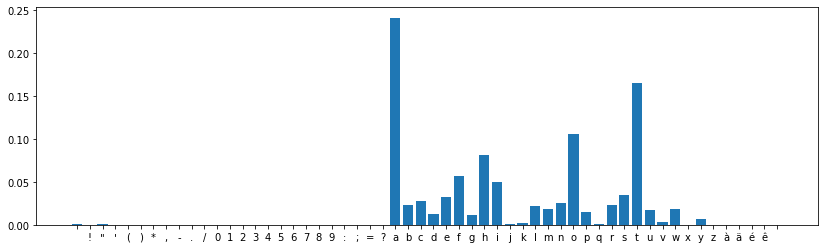

the meaning of life therad tostor ot if the gent on sidereding for to the hows shoule, himsercel, fullersers. standing t


In [7]:

predict_txt(txt)

In [8]:
len(txt)

20

***
### 3. Fit your model

- Fit your model a bit more (try 10 epochs), and regenerate a new `N=100` sentence sample. Does it get any better?

- Continue to fit the model (try 50 epochs), and again - generate a few more sampled sentences.

- You can try to the model further, and see what happens (you can also try to generate longer samples).

- If you wish, you can try using a different corpus (text) for the training (you can even try a text in hebrew). have fun!

Epoch 1/10
4995/4995 [==============================] - 21s 4ms/step - loss: 1.6990
Epoch 2/10
4995/4995 [==============================] - 21s 4ms/step - loss: 1.5598
Epoch 3/10
4995/4995 [==============================] - 21s 4ms/step - loss: 1.4836
Epoch 4/10
4995/4995 [==============================] - 21s 4ms/step - loss: 1.4340
Epoch 5/10
4995/4995 [==============================] - 21s 4ms/step - loss: 1.3985
Epoch 6/10
4995/4995 [==============================] - 21s 4ms/step - loss: 1.3715
Epoch 7/10
4995/4995 [==============================] - 21s 4ms/step - loss: 1.3504
Epoch 8/10
4995/4995 [==============================] - 21s 4ms/step - loss: 1.3327
Epoch 9/10
4995/4995 [==============================] - 21s 4ms/step - loss: 1.3183
Epoch 10/10
4995/4995 [==============================] - 21s 4ms/step - loss: 1.3055


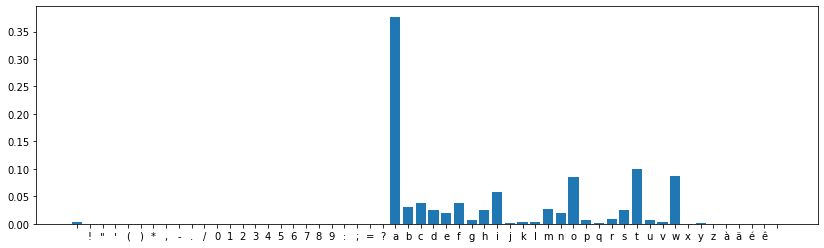

the meaning of life spaced quite on from the soldier of the brotherints.  pierre just and with so." he insidess moved wi


In [9]:
history = model.fit(X, Y, epochs=10, batch_size=128)
predict_txt(txt)

Epoch 1/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2945
Epoch 2/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2853
Epoch 3/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2766
Epoch 4/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2690
Epoch 5/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2622
Epoch 6/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2559
Epoch 7/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2505
Epoch 8/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2453
Epoch 9/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2409
Epoch 10/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2363
Epoch 11/50
4995/4995 [==============================] - 21s 4ms/step - loss: 1.2327
Epoch 12/50
4995/4995 [==============================] - 21s 4ms/step - lo

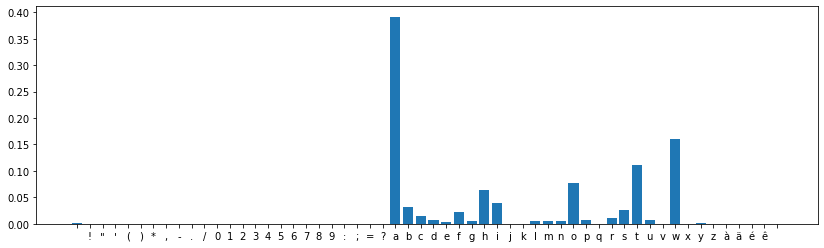

the meaning of life would beev imagines, but he alles his mother. on the year remints their men to the door she turned s


In [10]:
history = model.fit(X, Y, epochs=50, batch_size=128)
predict_txt(txt)

***
## Good Luck!